# Working with NR Extraction Radii

In this example we will review how information about extraction radii for waveform data is stored in catalog entries (scentry class objects as returned from scsearch). We will then use this informatoin to load waveforms with desired extraction radii.


-- *londonl@mit.edu 2019*

In [22]:
## Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import useful things
from positive import *
from numpy import *
from nrutils import scsearch,gwylm
from matplotlib.pyplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Find a Simulation
A = scsearch(q=1,precessing=True,institute='bam',verbose=True)

(scsearch)>> Found institute (=bam) keyword.
(scsearch)>> Found precessing (=True) keyword.
(scsearch)>> Found q (=1) keyword.
(scsearch)>> Found verbose (=True) keyword.
## Found 29 possibly degenerate simulations:
[0001][silures] BAM: 1chi0.50-2chi0.30-p-q1.00	(q1.__0._0.5_0.__0._-0.3_0.__D11_ppc_T_64_288)
[0002][silures] BAM: 1chi0.50-2chi0.30-p-q1.00	(q1.__-0.5_0._0.__0._0.3_0.__D11_ppc_T_64_288)
[0003][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0_0.75_0__D40D8.61073_T_64_288)
[0004][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0_-0.75_0__D40D11.1224_T_80_360)
[0005][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0.75_0_0__D40D8.52893_T_64_288)
[0006][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0_0.75_0__D40D11.1224_T_80_360)
[0007][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0.75_0_0__D40D10.1308_T_80_360)
[0008][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0.53033_0.53033_0__D40D8.32459_T_64_288)
[0009][silures] BAM: 2chi0.75-p-q1.00	(EOB_q1.__0_0_0__0.53033_-

### We have just loaded a lost of simulation catalog entries. Now we select one, and then print it's information about extraction radii.

**Extraction parameters and Extraction Radii**

Generally, NR groups do not label their datafiles by extraction radii, but some parmeter, often an integer, that is a stand-in for the actual extraction radii (in units of M).

This is particularly true for the BAM runs as demonstrated below.

In [27]:
# Select a simulation 
a = A[0] # indices of A are one-to-one with scsearch's verbose output
         # so index 0 is q4a08t90dPm1D_T_96_384

In [28]:
print '** The default extraction parameter is: ',a.default_extraction_par

** The default extraction parameter is:  5


In [29]:
print '** This simulation maps between extraction parameter and radius with: ',a.extraction_map_dict

** This simulation maps between extraction parameter and radius with:  {'level_map': {1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 5, 9: 5}, 'radius_map': {1: 50.0, 2: 60.0, 3: 70.0, 4: 80.0, 5: 90.0, 6: 100.0, 7: 120.0, 8: 140.0, 9: 160.0}}


In [30]:
print '** So the exact map between extraction parameter and radius is: ',a.extraction_map_dict['radius_map']

** So the exact map between extraction parameter and radius is:  {1: 50.0, 2: 60.0, 3: 70.0, 4: 80.0, 5: 90.0, 6: 100.0, 7: 120.0, 8: 140.0, 9: 160.0}


### Load waveforms from all extraction parameters

In [32]:
#
extraction_parameters = sort(a.extraction_map_dict['radius_map'].keys())

#
y = []
for EXTRACTION_PAR in extraction_parameters:
    #
    alert('Loading (2,2) multipole at r=%i'%a.extraction_map_dict['radius_map'][EXTRACTION_PAR],header=True)
    y.append( gwylm(a,lm=(2,2),clean=True,verbose=True,dt=0.5,extraction_parameter=EXTRACTION_PAR) )


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(notebook)>> Loading (2,2) multipole at r=50
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found extraction_parameter (=1) keyword.
(gwylm)>> Found lm (=(2, 2)) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x121703998>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (1,6), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2)]
(load)>> Using the default extraction_parameter of 1
(load)>> Using the default level of 6
(load)>> Loading: psi3col.r1.l6.l2.m2.gz
(load)>> Imposing a default pa

(notebook)>> Working r=50 ...
(notebook)>> Working r=60 ...
(notebook)>> Working r=70 ...
(notebook)>> Working r=80 ...
(notebook)>> Working r=90 ...
(notebook)>> Working r=100 ...
(notebook)>> Working r=120 ...
(notebook)>> Working r=140 ...
(notebook)>> Working r=160 ...


Text(0,0.5,'$|h_{22}|$')

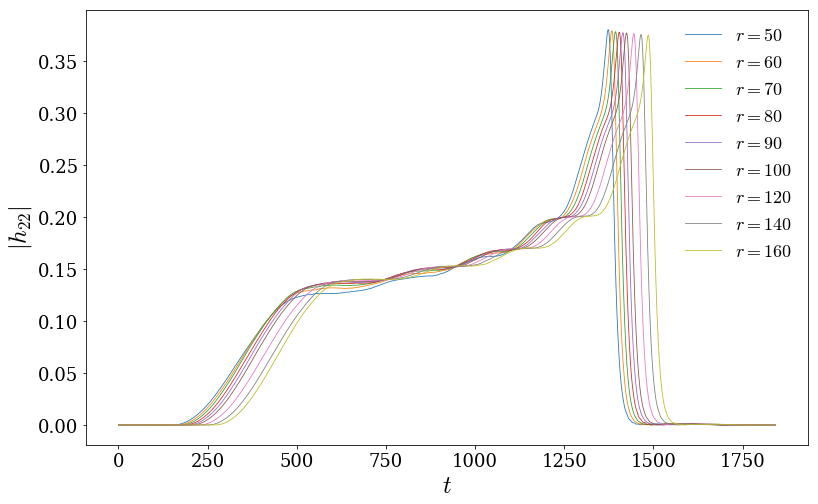

In [39]:
figure(figsize=2*figaspect(0.618))

l,m = 2,2

for yr in y:
    # let's plot the data in the raw waveform array 
    t,yp,yc = yr[l,m]['strain'].wfarr.T
    r = yr.__r__(yr.extraction_parameter)
    alert('Working r=%i ...'%r)
    # amplitude data also lives in yr[2,2]['strain'].amp
    amp = sqrt( yp**2 + yc**2 )
    plot( t,amp, label='$r=%i$'%r )
    
legend()
xlabel('$t$')
ylabel('$|h_{%i%i}|$'%(l,m))


(notebook)>> Working r=50 ...
(notebook)>> Working r=60 ...
(notebook)>> Working r=70 ...
(notebook)>> Working r=80 ...
(notebook)>> Working r=90 ...
(notebook)>> Working r=100 ...
(notebook)>> Working r=120 ...
(notebook)>> Working r=140 ...
(notebook)>> Working r=160 ...


Text(0.5,1,'time adjusted for extraction radius')

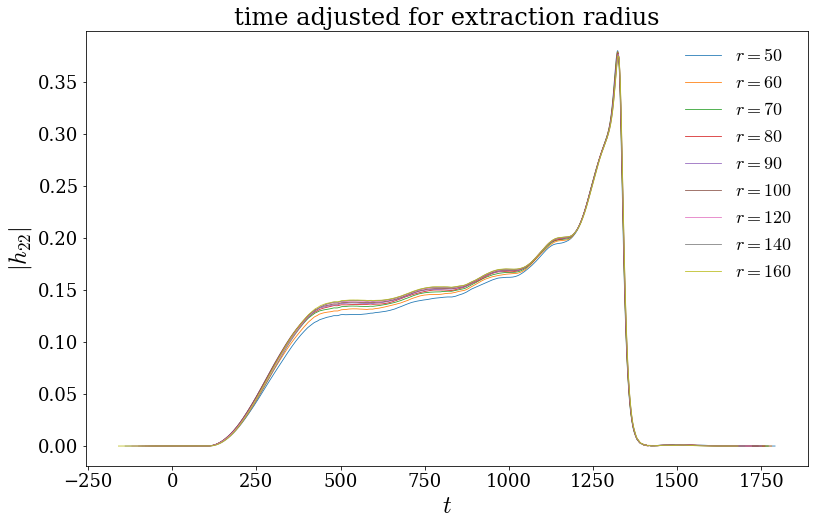

In [40]:
figure(figsize=2*figaspect(0.618))

l,m = 2,2

for yr in y:
    # let's plot the data in the raw waveform array 
    t,yp,yc = yr[l,m]['strain'].wfarr.T
    r = yr.__r__(yr.extraction_parameter)
    alert('Working r=%i ...'%r)
    # amplitude data also lives in yr[2,2]['strain'].amp
    amp = sqrt( yp**2 + yc**2 )
    plot( t-r,amp, label='$r=%i$'%r )
    
legend()
xlabel('$t$')
ylabel('$|h_{%i%i}|$'%(l,m))
title('time adjusted for extraction radius')

